# Turbulent Monte Carlo Simulation Project

Program code by
*Made Yogga Anggara Pangestu* | 23622001

This project analyze monte carlo method on two sample problem from the:
* **Borehole problem**: http://www.sfu.ca/~ssurjano/borehole.html 
* **Cantilever beam**: http://www.sfu.ca/~ssurjano/canti.html

## The Library

In [1]:
# Basic numerical library
import numpy as np

# Visualization library
import matplotlib.pyplot as plt

In [2]:
# ============================= #
# ---- Custom a fancy font ---- #
# ============================= #

## The used library
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ==================== 1 ==================== #
## All Font for matplotlib math font style (choose one font below)
plt.rcParams.update ({"mathtext.fontset" : "cm"})    # regular font for math
# plt.rcParams.update ({"mathtext.fontset" : "stix"})  # tighter than "cm"

# ==================== 2 ==================== #
## The code below store the path of each font style
## CMU Serif Classical Family (CMU but cursive)
CMU_sc = fm.FontProperties(fname='../../Font/CMU_Serif_Classic/cmunui.ttf')        # Standard
CMU_sc_it = fm.FontProperties(fname='../../Font/CMU_Serif_Classic/cmunti.ttf')     # Italic
CMU_sc_it_2 = fm.FontProperties(fname='../../Font/CMU_Serif_Classic/cmunci.ttf')   # Italic 2
CMU_sc_bd_it = fm.FontProperties(fname='../../Font/CMU_Serif_Classic/cmunbi.ttf')  # Bold Italic

## CMU Serif Family (Roman)
CMU_rm = fm.FontProperties(fname='../../Font/CMU_Serif/cmunrm.ttf')        # Standard
CMU_rm_it = fm.FontProperties(fname='../../Font/CMU_Serif/cmunsl.ttf')     # Italic
CMU_rm_bd = fm.FontProperties(fname='../../Font/CMU_Serif/cmunbx.ttf')     # Bold
CMU_rm_bd_it = fm.FontProperties(fname='../../Font/CMU_Serif/cmunbl.ttf')  # Bold Italic

## Problem 1: Borehole

In [23]:
# The current program show the procedure in calculating PDF and derivatives properties using a Monte Carlo Method
# The given function is a borehole problem with a constrain on the input

## INTERNAL VARIABLE
N         = int(1.02e7)   # The final number of realization
log_n_inv = 0.1    # The logarithmic interval between calculation of statistic properties

## OUTPUT VARIABLE
NUM = 0
DATA = []     # Collection of the output variable realization
samNUM = []   # The list of realization number at each stat. prop. calculation
meanDAT = []  # Data of EXPECTATION toward the number of realization
varDAT = []   # Data of VARIANCE toward the number of realization
skwDAT = []   # Data of SKEWNESS toward the number of realization
kurDAT = []   # Data of KURTOSIS toward the number of realization


## DATA REALIZATION DRAWING
expelled = 0

_inc = [10**i for i in np.linspace(0,0.9,10)]
_pos = 0
_lvl = 1
_val = int(np.round(_inc[_pos]*(10**_lvl)))

for i in range(N):
    # Input variable sample drawing
    # *****************************
    rw = np.random.normal(0.10, 0.0161812)
    if (rw < 0.05 or rw > 0.15):	# rw ∈ [0.05, 0.15]
        expelled += 1
        continue   # The variable is out of the range, throw this sample 
    r  = np.random.lognormal(7.71, 1.0056)
    if (r < 100 or r > 50000):	# r ∈ [100, 50000]
        expelled += 1
        continue   # The variable is out of the range, throw this sample 
    Tu = np.random.uniform(63070, 115600)
    Hu = np.random.uniform(990, 1110)
    Tl = np.random.uniform(63.1, 116)
    Hl = np.random.uniform(700, 820)
    L  = np.random.uniform(1120, 1680)
    Kw = np.random.uniform(9855, 12045)

    # Output calculation
    # ******************
    num = 2 * np.pi * Tu * (Hu-Hl)
    frac1 = 2*L*Tu / (np.log(r/rw)*(rw**2)*Kw)
    frac2 = Tu / Tl
    den = np.log(r/rw) * (1 + frac1 + frac2)
    DATA.append(num / den)
    NUM += 1
    
    # The switch function to calculate the statistic properties
    # *********************************************************
    if (np.mod(NUM,_val) == 0):
        # Update the _val
        _tmp = _pos + 1
        _lvl = _lvl + int(_tmp/10)
        _pos = np.mod(_tmp, 10)
        _val = int(np.round(_inc[_pos]*(10**_lvl)))

        # Calculate the statistic
        _num = NUM
        _mean = np.sum(DATA)/_num
        _var = np.sum((DATA - _mean)**2)/(_num)
        _skw = np.sum((DATA - _mean)**3)/((_num)*(_var**(1.5)))
        _kur = np.sum((DATA - _mean)**4)/((_num)*(_var**2))
        
        # Collect the data
        samNUM.append(_num)
        meanDAT.append(_mean)
        varDAT.append(_var)
        skwDAT.append(_skw)
        kurDAT.append(_kur)
    
    if (np.mod(np.log10(NUM),1)==0):
        print("The current iteration at : ",i, " with data number of :", NUM)

The current iteration at :  0  with data number of : 1
The current iteration at :  9  with data number of : 10
The current iteration at :  100  with data number of : 100
The current iteration at :  1005  with data number of : 1000
The current iteration at :  10037  with data number of : 10000
The current iteration at :  100374  with data number of : 100000
The current iteration at :  1004021  with data number of : 1000000
The current iteration at :  10040088  with data number of : 10000000


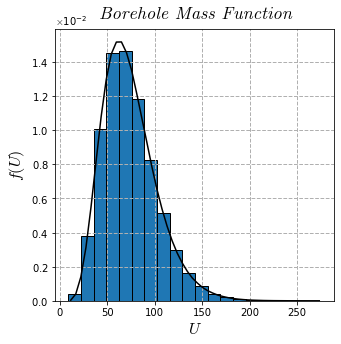

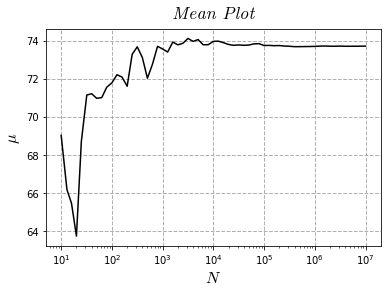

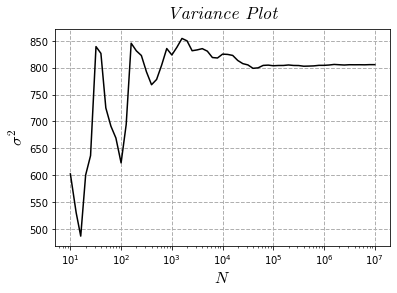

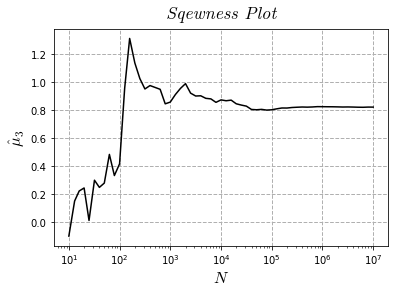

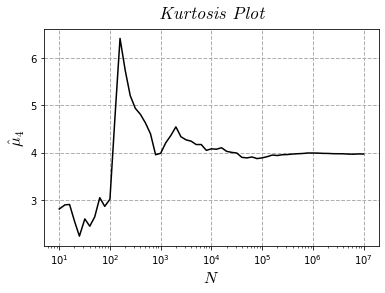

In [29]:
# AFTER ITERATION [VISUALIZATION]
# *******************************

# Histogram or PDF
# ----------------
plt.figure(figsize=(5,5))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Borehole Mass Function",                   # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$U$", fontsize=16)
plt.ylabel("$f(U)$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

# Calculation of PDF line point
y, binEdges = np.histogram(DATA, bins=50, density=1)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

# Plot the histogram and PDF
plt.hist(DATA, bins=20, density=1, ec="black")   # Histogram Plot
plt.plot(bincenters, y, '-', c='black')          # PDF plot
plt.savefig("B_Hist.png", dpi=300)
plt.show()


# Plot of Mean
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Mean Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\mu$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(samNUM, meanDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("B_Mean.png", dpi=300)
plt.show()


# Plot of Variance
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Variance Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\sigma^2$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(samNUM, varDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("B_Var.png", dpi=300)
plt.show()


# Plot of Skewness
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Sqewness Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\hat{\mu}_3$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(samNUM, skwDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("B_Skw.png", dpi=300)
plt.show()


# Plot of Kurtosis
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Kurtosis Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\hat{\mu}_4$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(samNUM, kurDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("B_Kur.png", dpi=300)
plt.show()

In [31]:
# Print the predicted value of Each statistic

# Borehole Flow Rate
# ******************
print("The statistic of Borehole")
print("> Mean     : ", meanDAT[-1])
print("> Variance : ", varDAT[-1])
print("> Skewness : ", skwDAT[-1])
print("> Kurtosis : ", kurDAT[-1])


The statistic of Borehole
> Mean     :  73.71310608629842
> Variance :  805.7327256779669
> Skewness :  0.8214440483138721
> Kurtosis :  3.970290473958609


## Project 2: Cantilever Beam

In [3]:
# The current program show the procedure in calculating PDF and derivatives properties using a Monte Carlo Method
# The given function is a borehole problem with a constrain on the input

## INTERNAL VARIABLE
N         = int(1.0001e7)   # The final number of realization
log_n_inv = 0.1    # The logarithmic interval between calculation of statistic properties
NUM = 0

## OUTPUT VARIABLE STRESS
S_DATA = []     # Collection of the output variable realization
S_samNUM = []   # The list of realization number at each stat. prop. calculation
S_meanDAT = []  # Data of EXPECTATION toward the number of realization
S_varDAT = []   # Data of VARIANCE toward the number of realization
S_skwDAT = []   # Data of SKEWNESS toward the number of realization
S_kurDAT = []   # Data of KURTOSIS toward the number of realization

## OUTPUT VARIABLE DISPLACEMENT
D_DATA = []     # Collection of the output variable realization
D_samNUM = []   # The list of realization number at each stat. prop. calculation
D_meanDAT = []  # Data of EXPECTATION toward the number of realization
D_varDAT = []   # Data of VARIANCE toward the number of realization
D_skwDAT = []   # Data of SKEWNESS toward the number of realization
D_kurDAT = []   # Data of KURTOSIS toward the number of realization

## DATA REALIZATION DRAWING
_inc = [10**i for i in np.linspace(0,0.9,10)]
_pos = 0
_lvl = 1
_val = int(np.round(_inc[_pos]*(10**_lvl)))

for i in range(N):
    # Input variable sample drawing
    # *****************************
    L = 100.0;
    D_0 = 2.2535;
    w = 4.0;
    t = 2.0;
    
    R = np.random.normal(40000, 2000)	# μ=40000, σ=2000
    E = np.random.normal(2.9E7, 1.45E6)	# μ=2.9E7, σ=1.45E6
    X = np.random.normal(500, 100)		# μ=500, σ=100
    Y = np.random.normal(1000, 100)		# μ=1000, σ=100

    # Output calculation
    # ******************
    
    # STRESS
    Sterm1 = 600*Y / (w*(t**2));
    Sterm2 = 600*X / ((w**2)*t);
    S = Sterm1 + Sterm2;
    S_DATA.append(S)

    # DISPLACEMENT
    Dfact1 = 4*(L**3) / (E*w*t);
    Dfact2 = np.sqrt((Y/(t**2))**2 + (X/(w**2))**2);
    D = Dfact1 * Dfact2;
    D_DATA.append(D)
    
    NUM += 1
    
    # The switch function to calculate the statistic properties
    # *********************************************************
    if (np.mod(NUM,_val) == 0):
        # Update the _val
        _tmp = _pos + 1
        _lvl = _lvl + int(_tmp/10)
        _pos = np.mod(_tmp, 10)
        _val = int(np.round(_inc[_pos]*(10**_lvl)))

        #     STRESS DATA 
        # *******************
        # Calculate the statistic
        _num = NUM
        _mean = np.sum(S_DATA)/_num
        _var = np.sum((S_DATA - _mean)**2)/(_num)
        _skw = np.sum((S_DATA - _mean)**3)/((_num)*(_var**(1.5)))
        _kur = np.sum((S_DATA - _mean)**4)/((_num)*(_var**2))
        
        # Collect the data
        S_samNUM.append(_num)
        S_meanDAT.append(_mean)
        S_varDAT.append(_var)
        S_skwDAT.append(_skw)
        S_kurDAT.append(_kur)
        
        #     DISPLACMENT DATA 
        # ************************
        # Calculate the statistic
        _num = NUM
        _mean = np.sum(D_DATA)/_num
        _var = np.sum((D_DATA - _mean)**2)/(_num)
        _skw = np.sum((D_DATA - _mean)**3)/((_num)*(_var**(1.5)))
        _kur = np.sum((D_DATA - _mean)**4)/((_num)*(_var**2))
        
        # Collect the data
        D_samNUM.append(_num)
        D_meanDAT.append(_mean)
        D_varDAT.append(_var)
        D_skwDAT.append(_skw)
        D_kurDAT.append(_kur)
    
    # ITERATION LOG
    if (np.mod(np.log10(NUM),1)==0):
        print("The newest iteration at : ",i , " with data number of :", NUM)

The newest iteration at :  0  with data number of : 1
The newest iteration at :  9  with data number of : 10
The newest iteration at :  99  with data number of : 100
The newest iteration at :  999  with data number of : 1000
The newest iteration at :  9999  with data number of : 10000
The newest iteration at :  99999  with data number of : 100000
The newest iteration at :  999999  with data number of : 1000000
The newest iteration at :  9999999  with data number of : 10000000


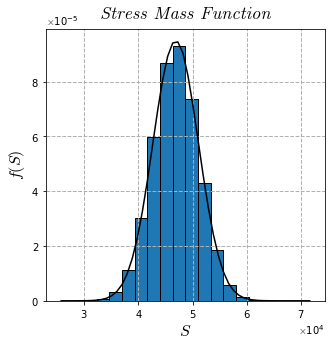

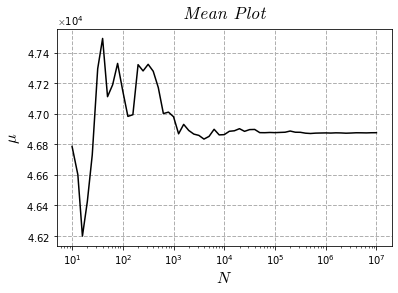

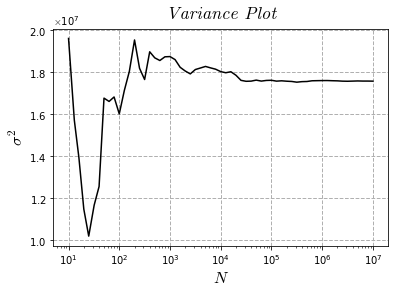

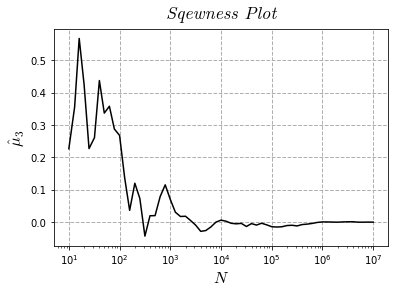

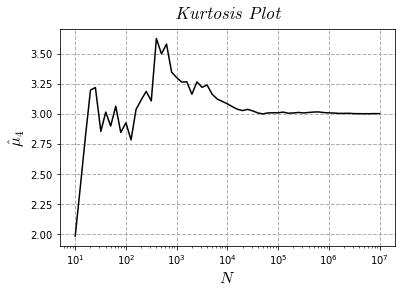

In [7]:
# AFTER ITERATION [VISUALIZATION of STRESS]
# *******************************

# Histogram or PDF
# ----------------
plt.figure(figsize=(5,5))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Stress Mass Function",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$S$", fontsize=16)
plt.ylabel("$f(S)$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

# Calculation of PDF line point
y, binEdges = np.histogram(S_DATA, bins=50, density=1)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

# Plot the histogram and PDF
plt.hist(S_DATA, bins=20, density=1, ec="black")   # Histogram Plot
plt.plot(bincenters, y, '-', c='black')          # PDF plot
plt.savefig("S_Hist.png", dpi=300)
plt.show()


# Plot of Mean
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Mean Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\mu$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

# Plot the histogram and PDF
plt.plot(S_samNUM, S_meanDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("S_Mean.png", dpi=300)
plt.show()


# Plot of Variance
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Variance Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\sigma^2$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)

# Plot the histogram and PDF
plt.plot(S_samNUM, S_varDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("S_Var.png", dpi=300)
plt.show()


# Plot of Skewness
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Sqewness Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\hat{\mu}_3$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(S_samNUM, S_skwDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("S_Skw.png", dpi=300)
plt.show()


# Plot of Kurtosis
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Kurtosis Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\hat{\mu}_4$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(S_samNUM, S_kurDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("S_Kur.png", dpi=300)
plt.show()

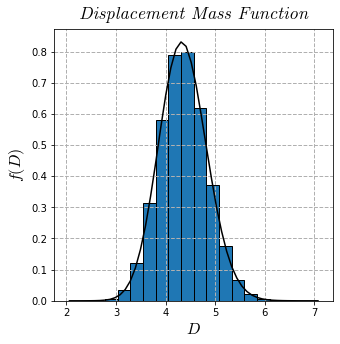

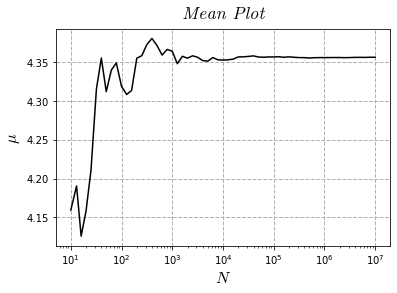

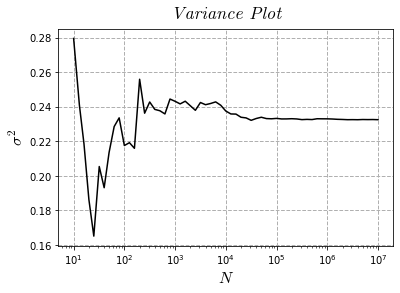

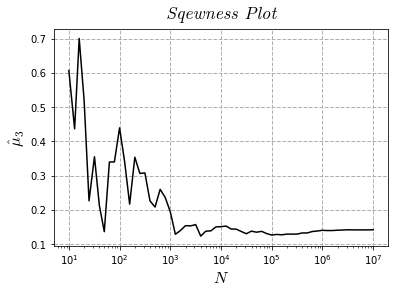

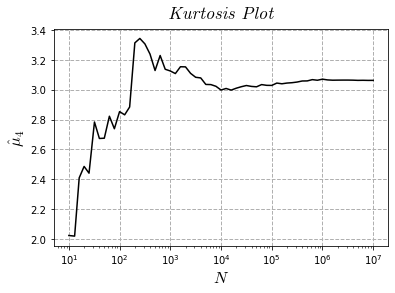

In [8]:
# AFTER ITERATION [VISUALIZATION of DISPLACEMENT]
# *******************************

# Histogram or PDF
# ----------------
plt.figure(figsize=(5,5))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Displacement Mass Function",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$D$", fontsize=16)
plt.ylabel("$f(D)$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Calculation of PDF line point
y, binEdges = np.histogram(D_DATA, bins=50, density=1)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

# Plot the histogram and PDF
plt.hist(D_DATA, bins=20, density=1, ec="black")   # Histogram Plot
plt.plot(bincenters, y, '-', c='black')          # PDF plot
plt.savefig("D_Hist.png", dpi=300)
plt.show()


# Plot of Mean
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Mean Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\mu$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(D_samNUM, D_meanDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("D_Mean.png", dpi=300)
plt.show()


# Plot of Variance
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Variance Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\sigma^2$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(D_samNUM, D_varDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("D_Var.png", dpi=300)
plt.show()


# Plot of Skewness
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Sqewness Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\hat{\mu}_3$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(D_samNUM, D_skwDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("D_Skw.png", dpi=300)
plt.show()


# Plot of Kurtosis
# ----------------
plt.figure(figsize=(6,4))

# Chart properties option
plt.grid("on", linestyle = '--', linewidth = 1.0)     # Turn on the grid
plt.title("Kurtosis Plot",                       # Name the title
          fontproperties=CMU_sc_it, size=18, pad = 10.0)
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$\hat{\mu}_4$", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Plot the histogram and PDF
plt.plot(D_samNUM, D_kurDAT, '-', c='black')   # Mean variation plot
plt.xscale('log')
plt.savefig("D_Kur.png", dpi=300)
plt.show()

In [6]:
# Print the predicted value of Each statistic

# Stress
# ******
print("The statistic of STRESS")
print("> Mean     : ", S_meanDAT[-1])
print("> Variance : ", S_varDAT[-1])
print("> Skewness : ", S_skwDAT[-1])
print("> Kurtosis : ", S_kurDAT[-1], "\n")


# Displacement
# ************
print("The statistic of DISPLACEMENT")
print("> Mean     : ", D_meanDAT[-1])
print("> Variance : ", D_varDAT[-1])
print("> Skewness : ", D_skwDAT[-1])
print("> Kurtosis : ", D_kurDAT[-1])


The statistic of STRESS
> Mean     :  46876.12149249002
> Variance :  17585790.410524406
> Skewness :  -0.00021974573890631095
> Kurtosis :  3.001243377784557 

The statistic of DISPLACEMENT
> Mean     :  4.3565592892737355
> Variance :  0.23255218573055259
> Skewness :  0.14147886808920704
> Kurtosis :  3.0634395585498533


## Statistic Observation on Python (other than this project)

The uniform distribution


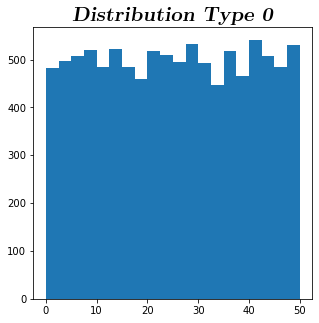

The normal distribution


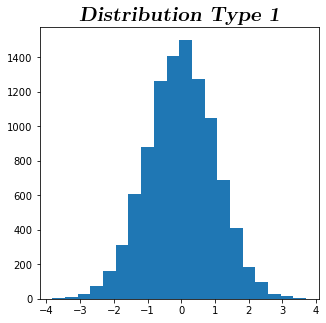

The exponential distribution


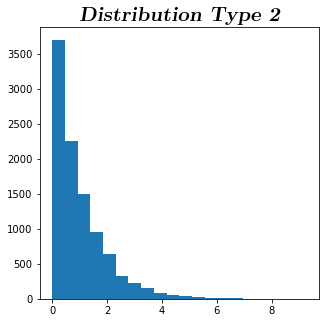

The lognormal distribution


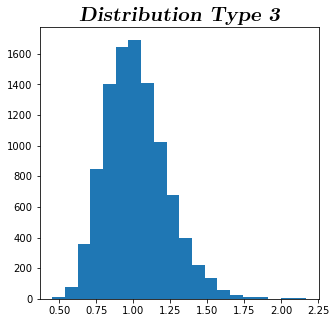

In [74]:
# Show a realization of pyhton random syntax

# Initialization
N = 10000     # Put high number to create a smooth histogram
for _type in range(4):    
    _data = []
    for sample in range (N):
        if (_type == 0):      # Uniform Distribution
            val = np.random.uniform(0,50)
            if (sample == 0):
                print("The uniform distribution")
        elif (_type == 1):    # Normal Distribution
            val = np.random.normal(0,1)
            if (sample == 0):
                print("The normal distribution")
        elif (_type == 2):    # Exponential Distribution
            val = np.random.exponential(1)
            if (sample == 0):
                print("The exponential distribution")
        elif (_type == 3):    # Log Normal Distribution
            val = np.random.lognormal(0,0.2)
            if (sample == 0):
                print("The lognormal distribution")
        _data.append(val)
    plt.figure(figsize=(5,5))
    plt.hist(_data, bins=20)
    plt.title("Distribution Type " + str(_type),fontproperties=CMU_rm_bd_it, size=20)
    plt.show()


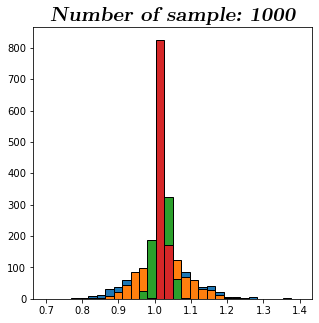

In [20]:
# Calculation of MEAN, VARIANCE, SKEWNESS, KURTOSIS using the MCM
# The current code will prove the Central Limit Theorem (CLT)

def draw_sample(n,_type=1):
    sample = []
    for i in range(n):
        if (_type == 0):      # Uniform Distribution
            val = np.random.uniform(0,10)
        elif (_type == 1):    # Normal Distribution
            val = np.random.normal(0,5)
        elif (_type == 2):    # Exponential Distribution
            val = np.random.exponential(0.5)
        elif (_type == 3):    # Log Normal Distribution
            val = np.random.lognormal(0,0.2)
        sample.append(val)
#     sample = np.array(temp)
    return sample

# Initialization
N = 1000     # Put high number to create a smooth histogram
n = [5,10,100,1000]    # The number of sample, This will be variated
i = -1
plt.figure(figsize=(5,5))
for sampleSizeVar in n:
    i += 1
    meanDAT = []
    varDAT = []
    skwDAT = []
    kurDAT = []
    for drawSample in range(N):
        sample = draw_sample(sampleSizeVar,3)
        sample = np.array(sample)
        
        # Calculation of each data identity
        _mean = np.sum(sample)/len(sample)
        _var = np.sum((sample - _mean)**2)/(len(sample)-1)
        _skw = np.sum((sample - _mean)**3)/((len(sample)-1)*(_var**(1.5)))
        _kur = np.sum((sample - _mean)**4)/((len(sample)-1)*(_var**2))
            
        meanDAT.append(_mean)
        varDAT.append(_var)
        skwDAT.append(_skw)
        kurDAT.append(_kur)
        
    plt.hist(meanDAT,bins=np.linspace(0.7,1.4,31),ec='black')
    plt.title("Number of sample: " + str(n[i]),fontproperties=CMU_rm_bd_it, size=20)

plt.show()